In [4]:
import requests as reqs
from requests.packages.urllib3.exceptions import InsecureRequestWarning
reqs.packages.urllib3.disable_warnings(InsecureRequestWarning)
import pandas as pd

In [2]:
sc="https://www.meteo.lv/josso_security_check"
sec_check=reqs.post(sc)
cookies=sec_check.cookies.get_dict()
cookies["JSESSIONID"]

'8463A99DC48C1A1C3E5C86641E4AEFBD'

In [3]:
url="https://www.meteo.lv/meteorologija-datu-meklesana/?"

headers={
"Content-Type":"application/x-www-form-urlencoded",
"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36",
"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
"Referer": "https://www.meteo.lv/meteorologija-datu-meklesana/?nid=461",
"Cookie": "JSESSIONID="+cookies["JSESSIONID"]
}

In [4]:
import json
saraksts=reqs.get("https://www.meteo.lv/klasifikatoru-filtrs/?iBy=station&iStation=&iParameter=4001&pMonitoringType=METEOROLOGY")
saraksts= json.loads(saraksts.text)

In [5]:
stacijuSaraksts={}
for each in saraksts["stations"][1:]:
    stacijuSaraksts[each["id"]]=each["name"]

parametruSaraksts={}
for each in saraksts["parameters"][1:]:
    parametruSaraksts[each["id"]]=each["name"]

In [6]:
parametruSaraksts

{'4515': 'Aramkārtas temperatūra 15 cm dziļumā, faktiskā',
 '4516': 'Aramkārtas temperatūra 20 cm dziļumā, faktiskā',
 '4513': 'Aramkārtas temperatūra 5 cm dziļumā, faktiskā',
 '4167': 'Atmosfēras spiediens stacijas līmenī, faktiskais',
 '4457': 'Augsnes virsmas stāvoklis',
 '4459': 'Augsnes virsmas temperatūra, faktiskā',
 '4464': 'Augsnes virsmas temperatūra, stundas maksimālā',
 '4462': 'Augsnes virsmas temperatūra, stundas minimālā',
 '4327': 'Augšējo mākoņu forma',
 '4001': 'Gaisa temperatūra, faktiskā',
 '4008': 'Gaisa temperatūra, maksimālā iepriekšējo 3 stundu laikā',
 '4003': 'Gaisa temperatūra, minimālā iepriekšējo 3 stundu laikā',
 '4006': 'Gaisa temperatūra, stundas maksimālā',
 '4004': 'Gaisa temperatūra, stundas minimālā',
 '4002': 'Gaisa temperatūra, stundas vidējā',
 '4321': 'Kopējais mākoņu daudzums',
 '10307': 'Laika apstakļi 1. kods pēdējā 1 stundā;A',
 '10308': 'Laika apstakļi 2. kods pēdējā 1 stundā;A',
 '10306': 'Laika apstakļi, faktiskie;A',
 '4627': 'Laika apstā

In [7]:
stationID=30036 # 30094 - Rīga, 30036 - Jelgava
paramID=4570 # 4001 - gaisa temp vidējā, 4341 - sniega sega stundas vidējā, 4570 nokrišņu daudzums stundas summa
startYear=2017
endYear=2021

In [8]:
for year in range(startYear,endYear+1):
    StartDate="01.01."+str(year)
    EndDate="31.12."+str(year)
    params="iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation="+str(stationID)+"&iParameter="+str(paramID)+"&iDateFrom="+StartDate+"&iDateTill="+EndDate
    fname=stacijuSaraksts[str(stationID)]+"_" \
    +parametruSaraksts[str(paramID)] + "_" \
    +StartDate+"-" \
    +EndDate+".xls"
    print(fname)
    
    result=reqs.post(url,verify=False,data=params, headers=headers)
    print(url,params)
    with open(fname, 'wb') as f:
        f.write(result.content)

Jelgava_Nokrišņu daudzums, stundas summa_01.01.2017-31.12.2017.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4570&iDateFrom=01.01.2017&iDateTill=31.12.2017
Jelgava_Nokrišņu daudzums, stundas summa_01.01.2018-31.12.2018.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4570&iDateFrom=01.01.2018&iDateTill=31.12.2018
Jelgava_Nokrišņu daudzums, stundas summa_01.01.2019-31.12.2019.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4570&iDateFrom=01.01.2019&iDateTill=31.12.2019
Jelgava_Nokrišņu daudzums, stundas summa_01.01.2020-31.12.2020.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4570&iDateFrom=01.01.2020&iDateTill=31.12.2020
Jelgava_Nokrišņu daudzums, stundas summa

In [9]:
df=[]

for enum, year in enumerate(range(startYear,endYear+1)):
    StartDate="01.01."+str(year)
    EndDate="31.12."+str(year)
    fname=stacijuSaraksts[str(stationID)]+"_" \
    +parametruSaraksts[str(paramID)] + "_" \
    +StartDate+"-" \
    +EndDate+".xls"
    #df[enum]=pd.read_excel(fname)
    df.append(pd.read_excel(fname,skiprows=1,parse_dates=["Datums \ Laiks"],index_col=0,dayfirst=True))
    #df[enum]["vidējā"]=df[enum].mean(axis=1)
    df[enum]["summa"]=df[enum].sum(axis=1)

In [10]:
nokrisni=pd.concat(df)
nokrisni=nokrisni[["summa"]]
nokrisni

,summa
Datums \ Laiks,
2017-01-01,0.2
2017-01-02,0.8
2017-01-03,0.0
2017-01-04,4.0
2017-01-05,0.2
...,...
2021-12-27,0.0
2021-12-28,0.0
2021-12-29,0.0


In [12]:
fname2=stacijuSaraksts[str(stationID)]+"_" \
    +parametruSaraksts[str(paramID)] + "_" \
    +str(startYear)+"-" \
    +str(endYear)+".xls"
nokrisni.to_excel(fname2)

In [14]:
stationID=30036 # 30094 - Rīga, 30036 - Jelgava
paramID=4001 # 4001 - gaisa temp vidējā, 4341 - sniega sega stundas vidējā, 4570 nokrišņu daudzums stundas summa
startYear=2017
endYear=2021

In [15]:
for year in range(startYear,endYear+1):
    StartDate="01.01."+str(year)
    EndDate="31.12."+str(year)
    params="iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation="+str(stationID)+"&iParameter="+str(paramID)+"&iDateFrom="+StartDate+"&iDateTill="+EndDate
    fname=stacijuSaraksts[str(stationID)]+"_" \
    +parametruSaraksts[str(paramID)] + "_" \
    +StartDate+"-" \
    +EndDate+".xls"
    print(fname)
    
    result=reqs.post(url,verify=False,data=params, headers=headers)
    print(url,params)
    with open(fname, 'wb') as f:
        f.write(result.content)

Jelgava_Gaisa temperatūra, faktiskā_01.01.2017-31.12.2017.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4001&iDateFrom=01.01.2017&iDateTill=31.12.2017
Jelgava_Gaisa temperatūra, faktiskā_01.01.2018-31.12.2018.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4001&iDateFrom=01.01.2018&iDateTill=31.12.2018
Jelgava_Gaisa temperatūra, faktiskā_01.01.2019-31.12.2019.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4001&iDateFrom=01.01.2019&iDateTill=31.12.2019
Jelgava_Gaisa temperatūra, faktiskā_01.01.2020-31.12.2020.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4001&iDateFrom=01.01.2020&iDateTill=31.12.2020
Jelgava_Gaisa temperatūra, faktiskā_01.01.2021-31.12.2021.xl

In [16]:
df=[]

for enum, year in enumerate(range(startYear,endYear+1)):
    StartDate="01.01."+str(year)
    EndDate="31.12."+str(year)
    fname=stacijuSaraksts[str(stationID)]+"_" \
    +parametruSaraksts[str(paramID)] + "_" \
    +StartDate+"-" \
    +EndDate+".xls"
    #df[enum]=pd.read_excel(fname)
    df.append(pd.read_excel(fname,skiprows=1,parse_dates=["Datums \ Laiks"],index_col=0,dayfirst=True))
    df[enum]["dienas vidējā temperatūra, C"]=df[enum].mean(axis=1)
    #df[enum]["vidējā"]=df[enum].mean(axis=1)

In [17]:
temperatura=pd.concat(df)
temperatura=temperatura[["dienas vidējā temperatūra, C"]]
temperatura

,"dienas vidējā temperatūra, C"
Datums \ Laiks,
2017-01-01,6.016667
2017-01-02,0.800000
2017-01-03,-2.641667
2017-01-04,-4.291667
2017-01-05,-13.229167
...,...
2021-12-27,-3.950000
2021-12-28,-8.379167
2021-12-29,-7.241667


In [18]:
#4080
stationID=30036 # 30094 - Rīga, 30036 - Jelgava
paramID=4080 # 4001 - gaisa temp vidējā, 4341 - sniega sega stundas vidējā, 4570 nokrišņu daudzums stundas summa, 4080 -rel mitrums
startYear=2017
endYear=2021

In [19]:
for year in range(startYear,endYear+1):
    StartDate="01.01."+str(year)
    EndDate="31.12."+str(year)
    params="iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation="+str(stationID)+"&iParameter="+str(paramID)+"&iDateFrom="+StartDate+"&iDateTill="+EndDate
    fname=stacijuSaraksts[str(stationID)]+"_" \
    +parametruSaraksts[str(paramID)] + "_" \
    +StartDate+"-" \
    +EndDate+".xls"
    print(fname)
    
    result=reqs.post(url,verify=False,data=params, headers=headers)
    print(url,params)
    with open(fname, 'wb') as f:
        f.write(result.content)

Jelgava_Relatīvais mitrums, faktiskais_01.01.2017-31.12.2017.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4080&iDateFrom=01.01.2017&iDateTill=31.12.2017
Jelgava_Relatīvais mitrums, faktiskais_01.01.2018-31.12.2018.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4080&iDateFrom=01.01.2018&iDateTill=31.12.2018
Jelgava_Relatīvais mitrums, faktiskais_01.01.2019-31.12.2019.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4080&iDateFrom=01.01.2019&iDateTill=31.12.2019
Jelgava_Relatīvais mitrums, faktiskais_01.01.2020-31.12.2020.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4080&iDateFrom=01.01.2020&iDateTill=31.12.2020
Jelgava_Relatīvais mitrums, faktiskais_01.01.202

In [20]:
df=[]

for enum, year in enumerate(range(startYear,endYear+1)):
    StartDate="01.01."+str(year)
    EndDate="31.12."+str(year)
    fname=stacijuSaraksts[str(stationID)]+"_" \
    +parametruSaraksts[str(paramID)] + "_" \
    +StartDate+"-" \
    +EndDate+".xls"
    #df[enum]=pd.read_excel(fname)
    df.append(pd.read_excel(fname,skiprows=1,parse_dates=["Datums \ Laiks"],index_col=0,dayfirst=True))
    df[enum]["vidējais relatīvais mitrums"]=df[enum].mean(axis=1)
    #df[enum]["vidējā"]=df[enum].mean(axis=1)

In [21]:

relMitrums=pd.concat(df)
relMitrums=relMitrums[["vidējais relatīvais mitrums"]]
relMitrums

,vidējais relatīvais mitrums
Datums \ Laiks,
2017-01-01,94.000000
2017-01-02,95.500000
2017-01-03,89.583333
2017-01-04,88.958333
2017-01-05,68.000000
...,...
2021-12-27,89.083333
2021-12-28,90.000000
2021-12-29,72.000000


In [22]:
stationID=30036 # 30094 - Rīga, 30036 - Jelgava
paramID=4341 # 4001 - gaisa temp vidējā, 4341 - sniega segas biezums stundas vidējā, cm, 4570 nokrišņu daudzums stundas summa
startYear=2017
endYear=2021

In [23]:
for year in range(startYear,endYear+1):
    StartDate="01.01."+str(year)
    EndDate="31.12."+str(year)
    params="iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation="+str(stationID)+"&iParameter="+str(paramID)+"&iDateFrom="+StartDate+"&iDateTill="+EndDate
    fname=stacijuSaraksts[str(stationID)]+"_" \
    +parametruSaraksts[str(paramID)] + "_" \
    +StartDate+"-" \
    +EndDate+".xls"
    print(fname)
    
    result=reqs.post(url,verify=False,data=params, headers=headers)
    print(url,params)
    with open(fname, 'wb') as f:
        f.write(result.content)

Jelgava_Sniega segas biezums, stundas vidējais_01.01.2017-31.12.2017.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4341&iDateFrom=01.01.2017&iDateTill=31.12.2017
Jelgava_Sniega segas biezums, stundas vidējais_01.01.2018-31.12.2018.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4341&iDateFrom=01.01.2018&iDateTill=31.12.2018
Jelgava_Sniega segas biezums, stundas vidējais_01.01.2019-31.12.2019.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4341&iDateFrom=01.01.2019&iDateTill=31.12.2019
Jelgava_Sniega segas biezums, stundas vidējais_01.01.2020-31.12.2020.xls
https://www.meteo.lv/meteorologija-datu-meklesana/? iBy=station&nid=461&pMonitoringType=METEOROLOGY&iStation=30036&iParameter=4341&iDateFrom=01.01.2020&iDateTill=31.12.2020
Jelgava_Sniega s

In [24]:
df=[]

for enum, year in enumerate(range(startYear,endYear+1)):
    StartDate="01.01."+str(year)
    EndDate="31.12."+str(year)
    fname=stacijuSaraksts[str(stationID)]+"_" \
    +parametruSaraksts[str(paramID)] + "_" \
    +StartDate+"-" \
    +EndDate+".xls"
    #df[enum]=pd.read_excel(fname)
    df.append(pd.read_excel(fname,skiprows=1,parse_dates=["Datums \ Laiks"],index_col=0,dayfirst=True))
    df[enum]["vidējais sniega segas biezums, cm"]=df[enum].mean(axis=1)
    #df[enum]["vidējā"]=df[enum].mean(axis=1)

In [25]:
sniegaSega=pd.concat(df)
sniegaSega=sniegaSega[["vidējais sniega segas biezums, cm"]]
sniegaSega

,"vidējais sniega segas biezums, cm"
Datums \ Laiks,
2017-01-01,0.000000
2017-01-02,0.166667
2017-01-03,0.291667
2017-01-04,6.750000
2017-01-05,7.375000
...,...
2021-12-27,10.000000
2021-12-28,9.125000
2021-12-29,9.000000


In [30]:

kopejais=nokrisni.join(temperatura, how="outer").join(sniegaSega, how="outer").join(relMitrums, how="outer")
kopejais

,summa,"dienas vidējā temperatūra, C","vidējais sniega segas biezums, cm",vidējais relatīvais mitrums
Datums \ Laiks,,,,
2017-01-01,0.2,6.016667,0.000000,94.000000
2017-01-02,0.8,0.800000,0.166667,95.500000
2017-01-03,0.0,-2.641667,0.291667,89.583333
2017-01-04,4.0,-4.291667,6.750000,88.958333
2017-01-05,0.2,-13.229167,7.375000,68.000000
...,...,...,...,...
2021-12-27,0.0,-3.950000,10.000000,89.083333
2021-12-28,0.0,-8.379167,9.125000,90.000000
2021-12-29,0.0,-7.241667,9.000000,72.000000


In [33]:
kopejais.to_excel("Jelgava_2017-2021_t_p_def.xls")

In [34]:
kopejais

,summa,"dienas vidējā temperatūra, C","vidējais sniega segas biezums, cm",vidējais relatīvais mitrums
Datums \ Laiks,,,,
2017-01-01,0.2,6.016667,0.000000,94.000000
2017-01-02,0.8,0.800000,0.166667,95.500000
2017-01-03,0.0,-2.641667,0.291667,89.583333
2017-01-04,4.0,-4.291667,6.750000,88.958333
2017-01-05,0.2,-13.229167,7.375000,68.000000
...,...,...,...,...
2021-12-27,0.0,-3.950000,10.000000,89.083333
2021-12-28,0.0,-8.379167,9.125000,90.000000
2021-12-29,0.0,-7.241667,9.000000,72.000000


In [51]:
fname="Jelgava_2017-2021_t_p_def.xls"
df=pd.read_excel(fname,parse_dates=["Datums \ Laiks"],index_col=0)
df=df.reindex(columns=["vidējais sniega segas biezums, cm","summa","dienas vidējā temperatūra, C","vidējais relatīvais mitrums"])
df

,"vidējais sniega segas biezums, cm",summa,"dienas vidējā temperatūra, C",vidējais relatīvais mitrums
Datums \ Laiks,,,,
2017-01-01,0.000000,0.2,6.016667,94.000000
2017-01-02,0.166667,0.8,0.800000,95.500000
2017-01-03,0.291667,0.0,-2.641667,89.583333
2017-01-04,6.750000,4.0,-4.291667,88.958333
2017-01-05,7.375000,0.2,-13.229167,68.000000
...,...,...,...,...
2021-12-27,10.000000,0.0,-3.950000,89.083333
2021-12-28,9.125000,0.0,-8.379167,90.000000
2021-12-29,9.000000,0.0,-7.241667,72.000000


In [86]:
window_size=12
for i in range(1, window_size):
    df[f'summa_{i}'] = df['summa'].shift(i)
    df[f'dvt_{i}'] = df['dienas vidējā temperatūra, C'].shift(i)
    df[f'vrm_{i}'] = df['vidējais relatīvais mitrums'].shift(i)
    
df=df.dropna()



# te sākas modelis

In [1]:
from keras.models import Sequential
from keras.layers import Dense

In [87]:
X = df.iloc[:, 1:]
X

,summa,"dienas vidējā temperatūra, C",vidējais relatīvais mitrums,summa_1,dvt_1,vrm_1,summa_2,dvt_2,vrm_2,summa_3,...,vrm_8,summa_9,dvt_9,vrm_9,summa_10,dvt_10,vrm_10,summa_11,dvt_11,vrm_11
Datums \ Laiks,,,,,,,,,,,,,,,,,,,,,
2017-01-12,1.3,-5.212500,83.583333,0.0,-8.637500,79.083333,0.0,-5.620833,84.333333,0.3,...,88.958333,0.0,-2.641667,89.583333,0.8,0.800000,95.500000,0.2,6.016667,94.000000
2017-01-13,4.9,0.687500,92.250000,1.3,-5.212500,83.583333,0.0,-8.637500,79.083333,0.0,...,68.000000,4.0,-4.291667,88.958333,0.0,-2.641667,89.583333,0.8,0.800000,95.500000
2017-01-14,3.1,-2.879167,98.833333,4.9,0.687500,92.250000,1.3,-5.212500,83.583333,0.0,...,81.875000,0.2,-13.229167,68.000000,4.0,-4.291667,88.958333,0.0,-2.641667,89.583333
2017-01-15,1.3,-1.341667,97.708333,3.1,-2.879167,98.833333,4.9,0.687500,92.250000,1.3,...,88.083333,0.0,-17.241667,81.875000,0.2,-13.229167,68.000000,4.0,-4.291667,88.958333
2017-01-16,0.0,-7.479167,96.416667,1.3,-1.341667,97.708333,3.1,-2.879167,98.833333,4.9,...,87.875000,0.3,-16.762500,88.083333,0.0,-17.241667,81.875000,0.2,-13.229167,68.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,-3.950000,89.083333,0.1,-5.500000,79.916667,0.5,-6.933333,87.416667,1.2,...,87.625000,1.6,3.362500,95.208333,0.5,3.658333,83.166667,0.1,3.991667,91.041667
2021-12-28,0.0,-8.379167,90.000000,0.0,-3.950000,89.083333,0.1,-5.500000,79.916667,0.5,...,70.125000,1.1,2.925000,87.625000,1.6,3.362500,95.208333,0.5,3.658333,83.166667
2021-12-29,0.0,-7.241667,72.000000,0.0,-8.379167,90.000000,0.0,-3.950000,89.083333,0.1,...,88.000000,0.5,-3.783333,70.125000,1.1,2.925000,87.625000,1.6,3.362500,95.208333


In [89]:
y = df.iloc[:, 0]
y

Datums \ Laiks
2017-01-12     8.458333
2017-01-13     8.541667
2017-01-14    14.416667
2017-01-15    12.958333
2017-01-16    12.250000
                ...    
2021-12-27    10.000000
2021-12-28     9.125000
2021-12-29     9.000000
2021-12-30     9.125000
2021-12-31     6.500000
Name: vidējais sniega segas biezums, cm, Length: 1814, dtype: float64

In [30]:
df = df.reindex(columns=['B', 'A', 'C'])

,summa,"dienas vidējā temperatūra, C","vidējais sniega segas biezums, cm",vidējais relatīvais mitrums,summa_1,dvt_1,vrm_1,summa_2,dvt_2,vrm_2,...,vrm_8,summa_9,dvt_9,vrm_9,summa_10,dvt_10,vrm_10,summa_11,dvt_11,vrm_11
Datums \ Laiks,,,,,,,,,,,,,,,,,,,,,
2017-01-12,1.3,-5.212500,8.458333,83.583333,0.0,-8.637500,79.083333,0.0,-5.620833,84.333333,...,88.958333,0.0,-2.641667,89.583333,0.8,0.800000,95.500000,0.2,6.016667,94.000000
2017-01-13,4.9,0.687500,8.541667,92.250000,1.3,-5.212500,83.583333,0.0,-8.637500,79.083333,...,68.000000,4.0,-4.291667,88.958333,0.0,-2.641667,89.583333,0.8,0.800000,95.500000
2017-01-14,3.1,-2.879167,14.416667,98.833333,4.9,0.687500,92.250000,1.3,-5.212500,83.583333,...,81.875000,0.2,-13.229167,68.000000,4.0,-4.291667,88.958333,0.0,-2.641667,89.583333
2017-01-15,1.3,-1.341667,12.958333,97.708333,3.1,-2.879167,98.833333,4.9,0.687500,92.250000,...,88.083333,0.0,-17.241667,81.875000,0.2,-13.229167,68.000000,4.0,-4.291667,88.958333
2017-01-16,0.0,-7.479167,12.250000,96.416667,1.3,-1.341667,97.708333,3.1,-2.879167,98.833333,...,87.875000,0.3,-16.762500,88.083333,0.0,-17.241667,81.875000,0.2,-13.229167,68.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,-3.950000,10.000000,89.083333,0.1,-5.500000,79.916667,0.5,-6.933333,87.416667,...,87.625000,1.6,3.362500,95.208333,0.5,3.658333,83.166667,0.1,3.991667,91.041667
2021-12-28,0.0,-8.379167,9.125000,90.000000,0.0,-3.950000,89.083333,0.1,-5.500000,79.916667,...,70.125000,1.1,2.925000,87.625000,1.6,3.362500,95.208333,0.5,3.658333,83.166667
2021-12-29,0.0,-7.241667,9.000000,72.000000,0.0,-8.379167,90.000000,0.0,-3.950000,89.083333,...,88.000000,0.5,-3.783333,70.125000,1.1,2.925000,87.625000,1.6,3.362500,95.208333


In [58]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
X_test

,summa,"dienas vidējā temperatūra, C",vidējais relatīvais mitrums,summa_1,dvt_1,vrm_1,summa_2,dvt_2,vrm_2,summa_3,...,vrm_8,summa_9,dvt_9,vrm_9,summa_10,dvt_10,vrm_10,summa_11,dvt_11,vrm_11
Datums \ Laiks,,,,,,,,,,,,,,,,,,,,,
2021-06-28,0.0,19.212500,83.166667,0.0,19.662500,79.333333,0.0,20.550000,77.250000,0.2,...,71.000000,0.0,22.629167,70.708333,0.0,20.679167,69.666667,0.0,17.733333,69.250000
2018-09-26,4.2,8.266667,84.958333,22.5,7.000000,80.666667,4.0,8.529167,85.708333,0.6,...,77.666667,0.0,14.612500,74.583333,0.0,12.775000,73.833333,2.5,12.383333,77.958333
2020-07-05,3.5,18.216667,87.083333,0.0,16.620833,84.583333,0.0,16.195833,82.916667,5.7,...,68.583333,0.0,23.291667,70.375000,0.0,21.837500,68.916667,0.0,22.012500,66.708333
2019-02-04,13.9,-0.979167,88.375000,0.0,1.920833,91.000000,6.2,1.458333,90.083333,2.2,...,88.208333,1.3,-10.600000,89.750000,2.1,-4.966667,90.166667,0.2,-4.958333,87.208333
2018-03-27,0.0,-1.787500,47.125000,0.0,2.462500,80.875000,0.0,3.295652,74.217391,0.0,...,67.208333,0.0,-3.125000,69.541667,0.0,-6.175000,59.166667,0.0,-5.662500,56.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-18,0.0,2.625000,90.250000,0.5,4.575000,89.791667,0.0,3.133333,92.000000,3.3,...,92.583333,0.0,3.850000,93.208333,0.0,4.404167,90.416667,0.0,3.000000,98.666667
2020-02-17,1.6,8.216667,68.333333,0.9,4.108333,81.458333,0.2,0.733333,86.833333,0.0,...,85.333333,0.5,1.870833,93.833333,0.0,-1.108333,67.416667,0.8,0.441667,72.875000
2017-12-06,0.5,0.758333,91.125000,3.5,-0.408333,93.375000,0.9,0.058333,94.875000,0.0,...,85.458333,0.0,1.500000,88.083333,0.6,4.233333,90.875000,6.4,5.816667,94.750000


In [102]:
from keras.models import Sequential
from keras.layers import Dense

In [103]:
# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model


In [104]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [105]:
X_train = X_train.values
y_train = y_train.values


In [106]:
X

,summa,"dienas vidējā temperatūra, C",vidējais relatīvais mitrums,summa_1,dvt_1,vrm_1,summa_2,dvt_2,vrm_2,summa_3,...,vrm_8,summa_9,dvt_9,vrm_9,summa_10,dvt_10,vrm_10,summa_11,dvt_11,vrm_11
Datums \ Laiks,,,,,,,,,,,,,,,,,,,,,
2017-01-12,1.3,-5.212500,83.583333,0.0,-8.637500,79.083333,0.0,-5.620833,84.333333,0.3,...,88.958333,0.0,-2.641667,89.583333,0.8,0.800000,95.500000,0.2,6.016667,94.000000
2017-01-13,4.9,0.687500,92.250000,1.3,-5.212500,83.583333,0.0,-8.637500,79.083333,0.0,...,68.000000,4.0,-4.291667,88.958333,0.0,-2.641667,89.583333,0.8,0.800000,95.500000
2017-01-14,3.1,-2.879167,98.833333,4.9,0.687500,92.250000,1.3,-5.212500,83.583333,0.0,...,81.875000,0.2,-13.229167,68.000000,4.0,-4.291667,88.958333,0.0,-2.641667,89.583333
2017-01-15,1.3,-1.341667,97.708333,3.1,-2.879167,98.833333,4.9,0.687500,92.250000,1.3,...,88.083333,0.0,-17.241667,81.875000,0.2,-13.229167,68.000000,4.0,-4.291667,88.958333
2017-01-16,0.0,-7.479167,96.416667,1.3,-1.341667,97.708333,3.1,-2.879167,98.833333,4.9,...,87.875000,0.3,-16.762500,88.083333,0.0,-17.241667,81.875000,0.2,-13.229167,68.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,-3.950000,89.083333,0.1,-5.500000,79.916667,0.5,-6.933333,87.416667,1.2,...,87.625000,1.6,3.362500,95.208333,0.5,3.658333,83.166667,0.1,3.991667,91.041667
2021-12-28,0.0,-8.379167,90.000000,0.0,-3.950000,89.083333,0.1,-5.500000,79.916667,0.5,...,70.125000,1.1,2.925000,87.625000,1.6,3.362500,95.208333,0.5,3.658333,83.166667
2021-12-29,0.0,-7.241667,72.000000,0.0,-8.379167,90.000000,0.0,-3.950000,89.083333,0.1,...,88.000000,0.5,-3.783333,70.125000,1.1,2.925000,87.625000,1.6,3.362500,95.208333


In [107]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
46/46 [==============================] - 1s 4ms/step - loss: 27.8717 - accuracy: 0.4135
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 7.9589 - accuracy: 0.4314
Epoch 3/20
46/46 [==============================] - 0s 4ms/step - loss: 6.9290 - accuracy: 0.4583
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 4.4833 - accuracy: 0.4886
Epoch 5/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9076 - accuracy: 0.5155
Epoch 6/20
46/46 [==============================] - 0s 4ms/step - loss: 3.1285 - accuracy: 0.5431
Epoch 7/20
46/46 [==============================] - 0s 4ms/step - loss: 2.9013 - accuracy: 0.5396
Epoch 8/20
46/46 [==============================] - 0s 4ms/step - loss: 3.0986 - accuracy: 0.5458
Epoch 9/20
46/46 [==============================] - 0s 4ms/step - loss: 2.8658 - accuracy: 0.5417
Epoch 10/20
46/46 [==============================] - 0s 4ms/step - loss: 2.7795 - accuracy: 0.5665
Epoch 11/20
46/46 

In [108]:
X_test = X_test.values
y_test = y_test.values

In [110]:
test_loss = model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 2.6675 - accuracy: 0.7658


In [111]:
test_loss

[2.6674692630767822, 0.7658402323722839]

In [112]:
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


In [117]:
import matplotlib.pyplot as plt

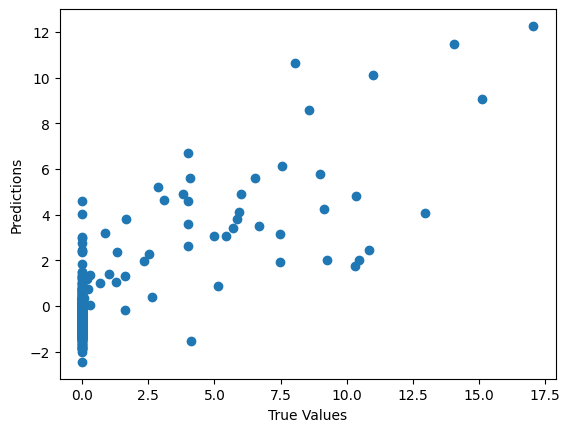

In [119]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [126]:
y_pred.ndim

2

In [128]:
y_test = y_test.dropna()
y_pred = y_pred[:len(y_test)]

# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [129]:
X

,summa,"dienas vidējā temperatūra, C",vidējais relatīvais mitrums,summa_1,dvt_1,vrm_1,summa_2,dvt_2,vrm_2,summa_3,...,vrm_8,summa_9,dvt_9,vrm_9,summa_10,dvt_10,vrm_10,summa_11,dvt_11,vrm_11
Datums \ Laiks,,,,,,,,,,,,,,,,,,,,,
2017-01-12,1.3,-5.212500,83.583333,0.0,-8.637500,79.083333,0.0,-5.620833,84.333333,0.3,...,88.958333,0.0,-2.641667,89.583333,0.8,0.800000,95.500000,0.2,6.016667,94.000000
2017-01-13,4.9,0.687500,92.250000,1.3,-5.212500,83.583333,0.0,-8.637500,79.083333,0.0,...,68.000000,4.0,-4.291667,88.958333,0.0,-2.641667,89.583333,0.8,0.800000,95.500000
2017-01-14,3.1,-2.879167,98.833333,4.9,0.687500,92.250000,1.3,-5.212500,83.583333,0.0,...,81.875000,0.2,-13.229167,68.000000,4.0,-4.291667,88.958333,0.0,-2.641667,89.583333
2017-01-15,1.3,-1.341667,97.708333,3.1,-2.879167,98.833333,4.9,0.687500,92.250000,1.3,...,88.083333,0.0,-17.241667,81.875000,0.2,-13.229167,68.000000,4.0,-4.291667,88.958333
2017-01-16,0.0,-7.479167,96.416667,1.3,-1.341667,97.708333,3.1,-2.879167,98.833333,4.9,...,87.875000,0.3,-16.762500,88.083333,0.0,-17.241667,81.875000,0.2,-13.229167,68.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,-3.950000,89.083333,0.1,-5.500000,79.916667,0.5,-6.933333,87.416667,1.2,...,87.625000,1.6,3.362500,95.208333,0.5,3.658333,83.166667,0.1,3.991667,91.041667
2021-12-28,0.0,-8.379167,90.000000,0.0,-3.950000,89.083333,0.1,-5.500000,79.916667,0.5,...,70.125000,1.1,2.925000,87.625000,1.6,3.362500,95.208333,0.5,3.658333,83.166667
2021-12-29,0.0,-7.241667,72.000000,0.0,-8.379167,90.000000,0.0,-3.950000,89.083333,0.1,...,88.000000,0.5,-3.783333,70.125000,1.1,2.925000,87.625000,1.6,3.362500,95.208333


In [131]:
y_pred = model.predict(X.values)

57/57 [==============================] - 0s 3ms/step


In [139]:
df["snowcover_predicted"]=y_pred

C:\Users\didzis\AppData\Local\Temp\ipykernel_6724\4223927865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["snowcover_predicted"]=y_pred


In [140]:
df

,"vidējais sniega segas biezums, cm",summa,"dienas vidējā temperatūra, C",vidējais relatīvais mitrums,summa_1,dvt_1,vrm_1,summa_2,dvt_2,vrm_2,...,summa_9,dvt_9,vrm_9,summa_10,dvt_10,vrm_10,summa_11,dvt_11,vrm_11,snowcover_predicted
Datums \ Laiks,,,,,,,,,,,,,,,,,,,,,
2017-01-12,8.458333,1.3,-5.212500,83.583333,0.0,-8.637500,79.083333,0.0,-5.620833,84.333333,...,0.0,-2.641667,89.583333,0.8,0.800000,95.500000,0.2,6.016667,94.000000,6.022294
2017-01-13,8.541667,4.9,0.687500,92.250000,1.3,-5.212500,83.583333,0.0,-8.637500,79.083333,...,4.0,-4.291667,88.958333,0.0,-2.641667,89.583333,0.8,0.800000,95.500000,4.221351
2017-01-14,14.416667,3.1,-2.879167,98.833333,4.9,0.687500,92.250000,1.3,-5.212500,83.583333,...,0.2,-13.229167,68.000000,4.0,-4.291667,88.958333,0.0,-2.641667,89.583333,8.016589
2017-01-15,12.958333,1.3,-1.341667,97.708333,3.1,-2.879167,98.833333,4.9,0.687500,92.250000,...,0.0,-17.241667,81.875000,0.2,-13.229167,68.000000,4.0,-4.291667,88.958333,9.452460
2017-01-16,12.250000,0.0,-7.479167,96.416667,1.3,-1.341667,97.708333,3.1,-2.879167,98.833333,...,0.3,-16.762500,88.083333,0.0,-17.241667,81.875000,0.2,-13.229167,68.000000,10.114874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,10.000000,0.0,-3.950000,89.083333,0.1,-5.500000,79.916667,0.5,-6.933333,87.416667,...,1.6,3.362500,95.208333,0.5,3.658333,83.166667,0.1,3.991667,91.041667,5.464911
2021-12-28,9.125000,0.0,-8.379167,90.000000,0.0,-3.950000,89.083333,0.1,-5.500000,79.916667,...,1.1,2.925000,87.625000,1.6,3.362500,95.208333,0.5,3.658333,83.166667,4.258253
2021-12-29,9.000000,0.0,-7.241667,72.000000,0.0,-8.379167,90.000000,0.0,-3.950000,89.083333,...,0.5,-3.783333,70.125000,1.1,2.925000,87.625000,1.6,3.362500,95.208333,6.522893


C:\Users\didzis\AppData\Local\Temp\ipykernel_6724\3974341183.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df[["vidējais sniega segas biezums, cm","snowcover_predicted"]]["2017-01"])


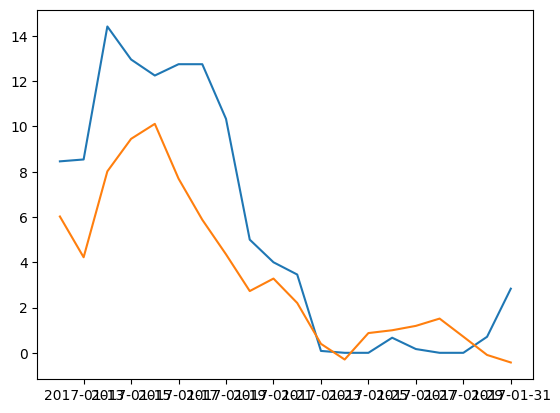

In [148]:
plt.plot(df[["vidējais sniega segas biezums, cm","snowcover_predicted"]]["2017-01"])